### __Gọi các thư viện cần thiết__

In [1]:
import pandas as pd

from utils import HelperFunctions

### __Khởi tạo tập dữ liệu__

In [2]:
study_hours = [2, 3, 5, 6, 4]
sleep_hours = [8, 7, 6, 5, 6]
results = ['Failed', 'Failed', 'Pass', 'Pass', 'Pass']
grades = [4.5, 5.5, 7.5, 8.5, 7.0]

data = {
    'Study Hours': study_hours,
    'Sleep Hours': sleep_hours,
    'Results': results,
    'Grades': grades
}

df = pd.DataFrame(data)

In [3]:
df

,Study Hours,Sleep Hours,Results,Grades
0,2,8,Failed,4.5
1,3,7,Failed,5.5
2,5,6,Pass,7.5
3,6,5,Pass,8.5
4,4,6,Pass,7.0


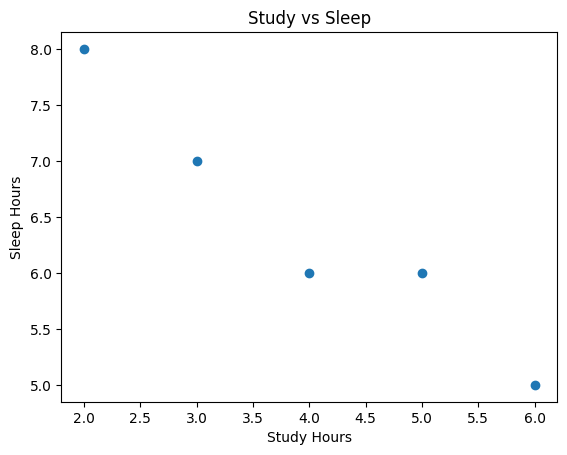

In [4]:
HelperFunctions.drawScatterPlot(
    x = df['Study Hours'],
    y = df['Sleep Hours'],
    xlabel = 'Study Hours',
    ylabel = 'Sleep Hours',
    title = 'Study vs Sleep'
)

In [5]:
study_hour, sleep_hour = 4, 7

### __<span style="color: red">Bước 1:</span> Lựa chọn siêu tham số k__

<div align="justify">

Với tập dữ liệu trên, việc chọn `k = 1` có thể quá nhạy cảm, trong khi chọn `k = 5` sẽ lấy tất cả các điểm. Do đó, lựa chọn hợp lý là `k = 3`. `k = 3` sẽ giúp cho chúng ta tránh được trường hợp hòa phiếu giữa 2 lớp `Pass` và `Failed` trong bài toán phân loại.

<div align="center">

__Lựa chọn:__ `k = 3`

</div>

</div>

In [6]:
k = 3

### __<span style="color: red">Bước 2:</span> Tính khoảng cách__

<div align="justify">

__Lựa chọn thước đo khoảng cách:__ Chúng ta sẽ sử dụng thước đo phổ biến nhất là _Khoảng cách Euclidean (L2)_

__Lưu ý về chuẩn hóa dữ liệu:__ Chuẩn hóa dữ liệu là một bước cực kỳ quan trọng. Tuy nhiên, với tập dữ liệu trên, đơn vị của 2 đặc trưng đều là giờ, nên sẽ tạm thời bỏ qua bước chuẩn hóa.

</div>

In [7]:
df['Distance'] = df.apply(lambda row: HelperFunctions.calculateL2Distance([row['Study Hours'], row['Sleep Hours']], [study_hour, sleep_hour]), axis=1)

In [8]:
df

,Study Hours,Sleep Hours,Results,Grades,Distance
0,2,8,Failed,4.5,2.236068
1,3,7,Failed,5.5,1.000000
2,5,6,Pass,7.5,1.414214
3,6,5,Pass,8.5,2.828427
4,4,6,Pass,7.0,1.000000


### __<span style="color: red">Bước 3:</span> Tìm k láng giềng gần nhất__

In [9]:
df_sorted = df.sort_values(by='Distance')
df = df_sorted[0:k]

In [10]:
df

,Study Hours,Sleep Hours,Results,Grades,Distance
1,3,7,Failed,5.5,1.000000
4,4,6,Pass,7.0,1.000000
2,5,6,Pass,7.5,1.414214


### __<span style="color: red">Bước 4:</span> Ra quyết định - Dự đoán kết quả__

#### __Dự đoán cho bài toán phân loại__

In [11]:
result = HelperFunctions.predictionClassification(df, 'Results')

In [12]:
print("Predicted class for the given features is:", result)

Predicted class for the given features is: Pass


#### __Dự đoán cho bài toán hồi quy__

In [13]:
averaging = HelperFunctions.predictionRegression(df, 'Grades', 'Distance')

In [14]:
print("Predicted average grade for the given features is:", averaging)

Predicted average grade for the given features is: 6.666666666666667


In [15]:
weightAveraging = HelperFunctions.predictionRegression(df, 'Grades', 'Distance', weight=True)

In [16]:
print("Predicted average grade for the given features is:", weightAveraging)

Predicted average grade for the given features is: 6.576504843704677
